In [8]:

import cv2
import numpy as np
import matplotlib.pyplot as plt
#print('OpenCV Version (should be 3.1.0, with nonfree packages installed, for this tutorial):')
print(cv2.__version__)
import PIL
from PIL import Image, ImageOps
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn.base import BaseEstimator, TransformerMixin
#from keras.preprocessing.image import ImageDataGenerator, img_to_array
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing

3.3.1


# Dataset loading

In [44]:
dataset = pd.read_csv('Z1-picture_cropping.csv', index_col=0, dtype={'foldername':'object'})
dataset.head()

,breed,file,xmin,ymin,xmax,ymax,foldername,filename,dog_number,prepfilename,xdelta,ydelta
n02085620_10074,Chihuahua,n02085620_10074,25.0,10.0,276.0,498.0,02085620,n02085620_10074,1,n02085620_10074-Chihuahua_cr1,251.0,488.0
n02085620_10131,Chihuahua,n02085620_10131,49.0,9.0,393.0,493.0,02085620,n02085620_10131,1,n02085620_10131-Chihuahua_cr1,344.0,484.0
n02085620_10621,Chihuahua,n02085620_10621,142.0,43.0,335.0,250.0,02085620,n02085620_10621,1,n02085620_10621-Chihuahua_cr1,193.0,207.0
n02085620_1073,Chihuahua,n02085620_1073,0.0,27.0,312.0,498.0,02085620,n02085620_1073,1,n02085620_1073-Chihuahua_cr1,312.0,471.0
n02085620_10976,Chihuahua,n02085620_10976,90.0,104.0,242.0,452.0,02085620,n02085620_10976,1,n02085620_10976-Chihuahua_cr1,152.0,348.0


In [64]:
le = preprocessing.LabelEncoder()
le.fit(dataset['breed'])
print(le.classes_)
dataset['breed_code'] = le.transform(dataset['breed'])
dataset.head()

['Afghan_hound' 'African_hunting_dog' 'Airedale'
 'American_Staffordshire_terrier' 'Appenzeller' 'Australian_terrier'
 'Bedlington_terrier' 'Bernese_mountain_dog' 'Blenheim_spaniel'
 'Border_collie' 'Border_terrier' 'Boston_bull' 'Bouvier_des_Flandres'
 'Brabancon_griffon' 'Brittany_spaniel' 'Cardigan'
 'Chesapeake_Bay_retriever' 'Chihuahua' 'Dandie_Dinmont' 'Doberman'
 'English_foxhound' 'English_setter' 'English_springer' 'EntleBucher'
 'Eskimo_dog' 'French_bulldog' 'German_shepherd'
 'German_short-haired_pointer' 'Gordon_setter' 'Great_Dane'
 'Great_Pyrenees' 'Greater_Swiss_Mountain_dog' 'Ibizan_hound'
 'Irish_setter' 'Irish_terrier' 'Irish_water_spaniel' 'Irish_wolfhound'
 'Italian_greyhound' 'Japanese_spaniel' 'Kerry_blue_terrier'
 'Labrador_retriever' 'Lakeland_terrier' 'Leonberg' 'Lhasa' 'Maltese_dog'
 'Mexican_hairless' 'Newfoundland' 'Norfolk_terrier' 'Norwegian_elkhound'
 'Norwich_terrier' 'Old_English_sheepdog' 'Pekinese' 'Pembroke'
 'Pomeranian' 'Rhodesian_ridgeback' 'Rottw

,breed,file,xmin,ymin,xmax,ymax,foldername,filename,dog_number,prepfilename,xdelta,ydelta,breed_code
n02085620_10074,Chihuahua,n02085620_10074,25.0,10.0,276.0,498.0,02085620,n02085620_10074,1,n02085620_10074-Chihuahua_cr1,251.0,488.0,17
n02085620_10131,Chihuahua,n02085620_10131,49.0,9.0,393.0,493.0,02085620,n02085620_10131,1,n02085620_10131-Chihuahua_cr1,344.0,484.0,17
n02085620_10621,Chihuahua,n02085620_10621,142.0,43.0,335.0,250.0,02085620,n02085620_10621,1,n02085620_10621-Chihuahua_cr1,193.0,207.0,17
n02085620_1073,Chihuahua,n02085620_1073,0.0,27.0,312.0,498.0,02085620,n02085620_1073,1,n02085620_1073-Chihuahua_cr1,312.0,471.0,17
n02085620_10976,Chihuahua,n02085620_10976,90.0,104.0,242.0,452.0,02085620,n02085620_10976,1,n02085620_10976-Chihuahua_cr1,152.0,348.0,17


In [65]:
subset = dataset[dataset['breed_code'] < 4]
subset.shape

(774, 13)

In [66]:
subset.head()

,breed,file,xmin,ymin,xmax,ymax,foldername,filename,dog_number,prepfilename,xdelta,ydelta,breed_code
n02088094_1003,Afghan_hound,n02088094_1003,45.0,43.0,289.0,490.0,02088094,n02088094_1003,1,n02088094_1003-Afghan_hound_cr1,244.0,447.0,0
n02088094_1007,Afghan_hound,n02088094_1007,236.0,80.0,447.0,332.0,02088094,n02088094_1007,1,n02088094_1007-Afghan_hound_cr1,211.0,252.0,0
n02088094_1023,Afghan_hound,n02088094_1023,174.0,214.0,267.0,382.0,02088094,n02088094_1023,2,n02088094_1023-Afghan_hound_cr2,93.0,168.0,0
n02088094_10263,Afghan_hound,n02088094_10263,11.0,115.0,355.0,423.0,02088094,n02088094_10263,1,n02088094_10263-Afghan_hound_cr1,344.0,308.0,0
n02088094_10715,Afghan_hound,n02088094_10715,31.0,43.0,290.0,483.0,02088094,n02088094_10715,1,n02088094_10715-Afghan_hound_cr1,259.0,440.0,0


In [67]:
X_train, X_test, y_train, y_test = train_test_split(subset, subset['breed_code'], test_size=0.33, random_state=0, stratify=subset['breed_code'])

# Class creation

In [70]:
class SiftBOW(BaseEstimator, TransformerMixin):

    def __init__(self, estimator, **params):        
        self.kmeans_params = {'n_clusters':75, 'verbose':0, 'random_state':3, 'max_iter': 300}
        self.sift_params = {'nfeatures':0}
        self.estimator_params = {'max_depth':None, 'random_state':0, 'verbose':5, 'n_estimators':500}
        self.pca_params = {'n_components':90, 'random_state':0}
        self.cvect_params = {'ngram_range':(1,1), 'min_df':1, 'max_df':1.}
        self.pics_params = {'basewidth':600, 'hsize':600,
                            'save_pics':True, 'whitening':False,
                            'scaling':True, 'equalyze':True}
        
        self.clf_params = {'trained':False, 'kmean_sample_size':10000}
        
        self.params = {**{'kmeans_'+k:v for k,v in self.kmeans_params.items()},
                       **{'sift_'+k:v for k,v in self.sift_params.items()},
                       **{'estimator_'+k:v for k,v in self.estimator_params.items()},
                       **{'cvect_'+k:v for k,v in self.cvect_params.items()},
                       **{'clf_'+k:v for k,v in self.clf_params.items()},
                       **{'pca_'+k:v for k,v in self.pca_params.items()},
                       **{'pics_'+k:v for k,v in self.pics_params.items()},
                       **params}
        
        self.update_params()
        self.estimator = estimator
        self.estimator.set_params(**self.estimator_params)
        self.kmeans = KMeans(**self.kmeans_params)
        self.scaler = StandardScaler()
        self.cvect = CountVectorizer(**self.cvect_params, analyzer='word', tokenizer=None)
        self.sift = cv2.xfeatures2d.SIFT_create(**self.sift_params)
        self.pca = PCA(**self.pca_params)
        #self.whitening = ImageDataGenerator(zca_whitening=True)
        
    def get_params(self, deep=True):
        return self.params
    
    def set_params(self, **params):
        self.params = {**self.params, **params}
        self.update_params()
        return self
        
    def update_params(self):
        
        self.kmeans_params = {k[7:]:v for k,v in self.params.items() if k.startswith('kmeans_')}
        self.sift_params = {k[5:]:v for k,v in self.params.items() if k.startswith('sift_')}
        self.estimator_params = {k[10:]:v for k,v in self.params.items() if k.startswith('estimator_')}
        self.pics_params = {k[5:]:v for k,v in self.params.items() if k.startswith('pics_')}
        
        self.cvect_params = {k[6:]:v for k,v in self.params.items() if k.startswith('cvect_')}
        self.pca_params = {k[4:]:v for k,v in self.params.items() if k.startswith('pca_')}
        self.clf_params = {k[4:]:v for k,v in self.params.items() if k.startswith('clf_')}

        return self

    def score(self, X, y):
        pics, sift_desc = self.transform(X)
        bow = self.predict_sift(sift_desc)
        Xbow = self.transform_bow(bow)
        
        return self.estimator.score(Xbow, y)
    
    def fit_bow(self, keydescriptors):
        self.cvect.fit(keydescriptors)
        print('BOW fitted')
        return self
    
    def transform_bow(self, keydescriptors):
        return self.cvect.transform(keydescriptors)
    
    def fit(self, X, y):
        pics, sift_desc = self.transform(X, y)
        #self.fit_whitening(pics)
        self.fit_sift(np.concatenate(sift_desc))
        bow = self.predict_sift(sift_desc)
        self.fit_bow(bow)
        Xbow = self.transform_bow(bow)
        
        self.estimator.fit(Xbow, y)
        
        
        self.clf_params['trained'] = True
        return self
    
    def transform(self, X, y=None):
        sift_desc = []
        pics = []
        rawpics = []
        for index, picture in X.iterrows():
            xmax = picture.xmax
            ymax = picture.ymax
            xmin = picture.xmin
            ymin = picture.ymin
            foldername = picture.foldername
            breed = picture.breed
            filename = picture.filename
            prepfilename = picture.prepfilename
        
            #Image opening
            img = Image.open('../Images/n{}-{}/{}.jpg'.format(foldername, breed, filename))
            #Image cropping
            area = (xmin, ymin, xmax, ymax)
            img = img.crop(area)

            #Image greyscale
            img = ImageOps.grayscale(img)
            
            #Image equalization
            img = ImageOps.equalize(img)

            if self.pics_params['scaling']:
                #Image resizing
                img = img.resize((self.pics_params['basewidth'], self.pics_params['hsize']), PIL.Image.ANTIALIAS)
            
            rawpics.append(img)
            
        for picture in rawpics:
            temp_img, temp_sift = self.treat_pictures(picture)
            pics.append(temp_img)
            sift_desc.append(temp_sift)
        
        print('Pictures loaded')
        
        return pics, sift_desc
    
    def predict(self, X, y):
        pics, sift_desc = self.transform(X, y)
        bow = self.predict_sift(sift_desc)
        Xbow = self.transform_bow(bow)
        
        return self.estimator.predict(Xbow)
    
    def fit_whitening(self, pictures):
        print('pictures', pictures.shape)
        self.whitening.fit(pictures)
        print('Whitening fitted')
        return self
    
    def fit_sift(self, descriptors):
        indices = np.random.randint(0,descriptors.shape[0],self.clf_params['kmean_sample_size'])
        Xsample = descriptors[indices]
        Xscaled = self.scaler.fit_transform(Xsample)
        Xpca = self.pca.fit_transform(Xscaled)
        self.kmeans.fit(Xpca)
        print('sift fitted')
        return self
    
    def predict_sift(self, descriptors):
        toreturn = []
        for descriptor in descriptors:
            XScaled = self.scaler.transform(descriptor)
            XPca = self.pca.transform(XScaled)
            bow = [self.kmeans.predict(keydescription.reshape(1, -1))[0] for keydescription in XPca]
            keystring = ' '.join([str(x) for x in bow])
            toreturn.append(keystring)
        return toreturn
    
    def exportset(self, X):
        pics, sift_desc = self.transform(X, y)
        bow = self.predict_sift(sift_desc)
        Xbow = self.transform_bow(bow)
        return Xbow
    
    def treat_pictures(self, img, y=None):
        #self.pics_params['basewidth'], self.pics_params['hsize']
        #Picture conversion to OPENCCV
        imcv = cv2.cvtColor(np.asarray(img), cv2.COLOR_GRAY2BGR)

        imcv_kp, imcv_desc = self.sift.detectAndCompute(imcv, None)
        #show_sift_features(imcv, color_img, grey_img_kp)

        if self.pics_params['save_pics']:
            #Image saving OpenCV
            cv2.imwrite('../pics/{}.jpg'.format(prepfilename),cv2.drawKeypoints(imcv, imcv_kp, imcv.copy()))
        
        return img, imcv_desc

clf = RandomForestClassifier()
dogreconizer = SiftBOW(clf, **{'pics_save_pics':False, 'pics_scaling':False})
#dogreconizer.get_params()

In [71]:
dogreconizer.fit(X_train, y_train)

Pictures loaded
sift fitted
BOW fitted
building tree 1 of 500
building tree 2 of 500
building tree 3 of 500
building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building t

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 52 of 500
building tree 53 of 500
building tree 54 of 500
building tree 55 of 500
building tree 56 of 500
building tree 57 of 500
building tree 58 of 500
building tree 59 of 500
building tree 60 of 500
building tree 61 of 500
building tree 62 of 500
building tree 63 of 500
building tree 64 of 500
building tree 65 of 500
building tree 66 of 500
building tree 67 of 500
building tree 68 of 500
building tree 69 of 500
building tree 70 of 500
building tree 71 of 500
building tree 72 of 500
building tree 73 of 500
building tree 74 of 500
building tree 75 of 500
building tree 76 of 500
building tree 77 of 500
building tree 78 of 500
building tree 79 of 500
building tree 80 of 500
building tree 81 of 500
building tree 82 of 500
building tree 83 of 500
building tree 84 of 500
building tree 85 of 500
building tree 86 of 500
building tree 87 of 500
building tree 88 of 500
building tree 89 of 500
building tree 90 of 500
building tree 91 of 500
building tree 92 of 500
building tree 93

building tree 423 of 500
building tree 424 of 500
building tree 425 of 500
building tree 426 of 500
building tree 427 of 500
building tree 428 of 500
building tree 429 of 500
building tree 430 of 500
building tree 431 of 500
building tree 432 of 500
building tree 433 of 500
building tree 434 of 500
building tree 435 of 500
building tree 436 of 500
building tree 437 of 500
building tree 438 of 500
building tree 439 of 500
building tree 440 of 500
building tree 441 of 500
building tree 442 of 500
building tree 443 of 500
building tree 444 of 500
building tree 445 of 500
building tree 446 of 500
building tree 447 of 500
building tree 448 of 500
building tree 449 of 500
building tree 450 of 500
building tree 451 of 500
building tree 452 of 500
building tree 453 of 500
building tree 454 of 500
building tree 455 of 500
building tree 456 of 500
building tree 457 of 500
building tree 458 of 500
building tree 459 of 500
building tree 460 of 500
building tree 461 of 500
building tree 462 of 500


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    2.2s finished


SiftBOW(clf_kmean_sample_size=10000, clf_trained=False, cvect_max_df=1.0,
    cvect_min_df=1, cvect_ngram_range=(1, 1), estimator_max_depth=None,
    estimator_n_estimators=500, estimator_random_state=0,
    estimator_verbose=5, kmeans_max_iter=300, kmeans_n_clusters=75,
    kmeans_random_state=3, kmeans_verbose=0, pca_n_components=90,
    pca_random_state=0, pics_basewidth=600, pics_equalyze=True,
    pics_hsize=600, pics_save_pics=False, pics_scaling=False,
    pics_whitening=False, sift_nfeatures=0)

In [72]:
dogreconizer.predict(X_test, y_test)

Pictures loaded


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


array([1, 0, 0, 3, 2, 0, 0, 0, 0, 3, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2,
       0, 3, 0, 0, 2, 1, 2, 3, 0, 2, 0, 1, 2, 1, 0, 1, 1, 1, 2, 2, 0, 2,
       0, 1, 2, 1, 2, 0, 2, 0, 0, 3, 2, 0, 1, 2, 0, 0, 1, 0, 0, 3, 1, 1,
       2, 1, 0, 1, 3, 1, 0, 1, 0, 3, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 0, 0,
       2, 2, 2, 0, 3, 0, 1, 3, 2, 3, 0, 0, 3, 1, 3, 2, 0, 2, 3, 3, 0, 0,
       3, 3, 0, 0, 1, 0, 2, 0, 0, 0, 3, 3, 0, 0, 0, 2, 1, 0, 0, 2, 3, 0,
       1, 0, 2, 0, 2, 2, 2, 2, 3, 3, 1, 1, 3, 1, 2, 0, 1, 3, 2, 2, 3, 2,
       2, 0, 3, 0, 0, 2, 2, 3, 3, 0, 0, 2, 0, 0, 2, 2, 3, 0, 0, 1, 0, 0,
       1, 1, 2, 1, 0, 0, 3, 0, 0, 0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 3, 2, 2,
       2, 3, 0, 2, 1, 0, 1, 1, 0, 0, 2, 1, 0, 1, 0, 2, 0, 3, 0, 1, 1, 2,
       0, 1, 2, 0, 0, 2, 2, 3, 0, 2, 2, 2, 1, 0, 1, 0, 0, 3, 2, 2, 2, 0,
       1, 0, 3, 0, 2, 0, 0, 0, 1, 1, 0, 1, 2, 2])

In [73]:
dogreconizer.score(X_test, y_test)

Pictures loaded


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


0.6328125

In [74]:
from sklearn.metrics import confusion_matrix
y_pred = dogreconizer.predict(X_test, y_test)
confusion_matrix(y_test, y_pred)


Pictures loaded


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


array([[64,  3,  6,  6],
       [ 9, 33, 11,  3],
       [13,  4, 44,  6],
       [19,  7,  7, 21]])

In [75]:
dogreconizer = SiftBOW(clf, **{'pics_save_pics':False, 'pics_scaling':True})
dogreconizer.fit(X_train, y_train)
dogreconizer.score(X_test, y_test)

Pictures loaded
sift fitted
BOW fitted
building tree 1 of 500
building tree 2 of 500
building tree 3 of 500
building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building t

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 47 of 500
building tree 48 of 500
building tree 49 of 500
building tree 50 of 500
building tree 51 of 500
building tree 52 of 500
building tree 53 of 500
building tree 54 of 500
building tree 55 of 500
building tree 56 of 500
building tree 57 of 500
building tree 58 of 500
building tree 59 of 500
building tree 60 of 500
building tree 61 of 500
building tree 62 of 500
building tree 63 of 500
building tree 64 of 500
building tree 65 of 500
building tree 66 of 500
building tree 67 of 500
building tree 68 of 500
building tree 69 of 500
building tree 70 of 500
building tree 71 of 500
building tree 72 of 500
building tree 73 of 500
building tree 74 of 500
building tree 75 of 500
building tree 76 of 500
building tree 77 of 500
building tree 78 of 500
building tree 79 of 500
building tree 80 of 500
building tree 81 of 500
building tree 82 of 500
building tree 83 of 500
building tree 84 of 500
building tree 85 of 500
building tree 86 of 500
building tree 87 of 500
building tree 88

building tree 415 of 500
building tree 416 of 500
building tree 417 of 500
building tree 418 of 500
building tree 419 of 500
building tree 420 of 500
building tree 421 of 500
building tree 422 of 500
building tree 423 of 500
building tree 424 of 500
building tree 425 of 500
building tree 426 of 500
building tree 427 of 500
building tree 428 of 500
building tree 429 of 500
building tree 430 of 500
building tree 431 of 500
building tree 432 of 500
building tree 433 of 500
building tree 434 of 500
building tree 435 of 500
building tree 436 of 500
building tree 437 of 500
building tree 438 of 500
building tree 439 of 500
building tree 440 of 500
building tree 441 of 500
building tree 442 of 500
building tree 443 of 500
building tree 444 of 500
building tree 445 of 500
building tree 446 of 500
building tree 447 of 500
building tree 448 of 500
building tree 449 of 500
building tree 450 of 500
building tree 451 of 500
building tree 452 of 500
building tree 453 of 500
building tree 454 of 500


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    2.2s finished


Pictures loaded


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


0.55078125

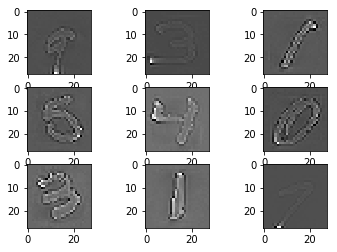

In [170]:
# ZCA whitening
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
from keras import backend as K
K.set_image_dim_ordering('th')
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
# convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# define data preparation
datagen = ImageDataGenerator(zca_whitening=True)
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    # create a grid of 3x3 images
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
    # show the plot
    pyplot.show()
    break

In [180]:
X_train[1][0][1].shape

(28,)

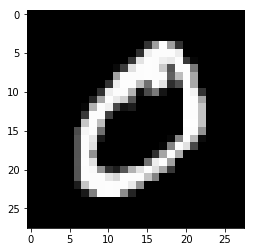

In [174]:
plt.imshow(X_train[1].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
plt.show()

In [30]:
X_train[0][0]

array([[   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.